In [1]:
# Importing Modules
import numpy as np    # Arrays
import matplotlib.pyplot as plt    # Displaying Images
import tensorflow as t    # Connected to Keras
from tensorflow import keras   # Neural Network making

In [2]:
# Importing Dataset
fashion_mnist = t.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Labels from Dataset for later reference
cloth = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

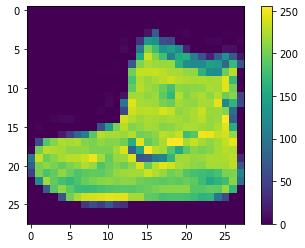

In [4]:
# Show an image in colour for neural network
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Greyscale all images to make neural network more accurate
train_images = train_images/255.0
test_images = test_images/255.0

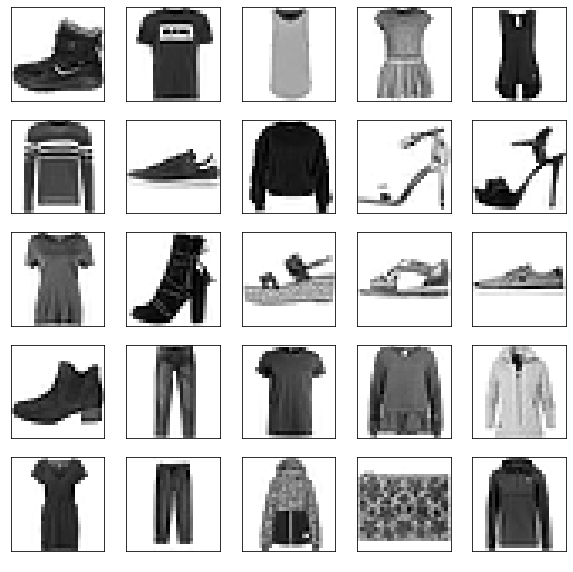

In [6]:
# Displaying first 25 images
plt.figure(figsize=(10,10))

for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(cloth[train_labels[i]],color='white')
plt.show()

In [7]:
# Make a model
model = t.keras.Sequential([
    t.keras.layers.Flatten(input_shape=(28, 28)),    # Turn 2D Array to 1D Array
    t.keras.layers.Dense(128, activation='relu'),    # First Neuron has 128 nodes
    t.keras.layers.Dense(10)    # Tells which type of cloth it is
])

In [8]:
# Compiling Model
model.compile(optimizer='adam',
              loss=t.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# Actually training the model
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.5021 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3768 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.3401 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.3151 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.2951 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2821 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.2567 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2460 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 2s 987us/step -

In [10]:
# Get Accuracy
test_loss, test_accuracy = model.evaluate(test_images,test_labels,verbose=2)
print("Accuracy:",test_accuracy)

313/313 - 0s - loss: 0.3500 - accuracy: 0.8741
Accuracy: 0.8741000294685364


In [11]:
# Make this model as a variable
probability_model = t.keras.Sequential([model, t.keras.layers.Softmax()])

In [12]:
# Try predicting
predictions = probability_model.predict(test_images)

In [13]:
# Print first 10 predictions
for i in range(0,10):
    if np.argmax(predictions[i]) == test_labels[i]:
        print(np.argmax(predictions[i]),",",test_labels[i])
        print("Nice")
    else:
        print(np.argmax(predictions[i]),",",test_labels[i])
        print("Not Nice")

9 , 9
Nice
2 , 2
Nice
1 , 1
Nice
1 , 1
Nice
6 , 6
Nice
1 , 1
Nice
4 , 4
Nice
6 , 6
Nice
5 , 5
Nice
7 , 7
Nice


In [14]:
# Predicting a random image
img = test_images[7]
img = (np.expand_dims(img, 0)) # Expanding array making it bigger

# Predicting and Printing Result
predict = probability_model.predict(img)
print(predict)

[[1.7099005e-06 3.5989031e-10 8.1403169e-04 2.0001127e-05 1.4028662e-02
  5.5577520e-10 9.8513538e-01 3.5998458e-09 2.0313018e-07 8.0548324e-10]]


In [49]:
# Checking index to ensure no mistakes were made
np.argmax(predict[0])    # Remember: it is indexed (Here 6 is technically the 7th element ie shirt)

6